In [6]:
import cv2
from matplotlib import pyplot as plt

In [7]:
image_path = '../assets/img/bibichos.jpg'
cv2_image = cv2.imread(image_path)
cv2_image_gray = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)

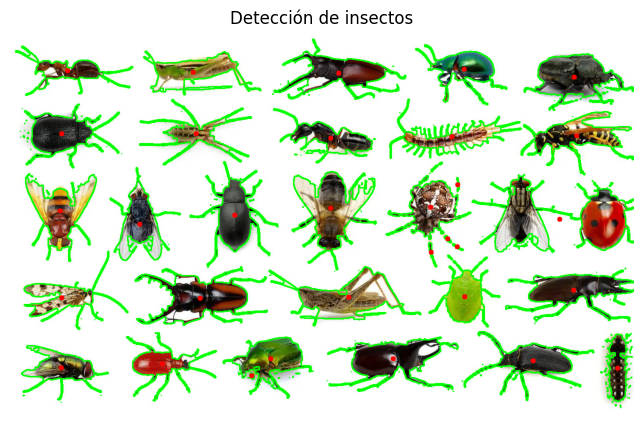

In [8]:
blurred = cv2.GaussianBlur(cv2_image_gray, (5, 5), 0)

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = cv2_image.copy()

cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

centers = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        area = cv2.contourArea(contour)
        if area > 50:
            centers.append((cX, cY))

for center in centers:
    cv2.circle(output, center, 5, (0, 0, 255), -1)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detección de insectos")
plt.axis("off")
plt.show()